# Importing neccessary libraries
    - pandas will be used to communicate or load our document
    - numpy will be used for calculations on our responses

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load Respondents data
    - since our data came as csv from google forms we will use pandas read csv function

In [29]:
df = pd.read_csv('laila.csv')

## change all spaces to underscore[for spss use]
    -since spss doesnt allow spaces , we will replace space with underscore 

In [30]:
df.columns = df.columns.str.replace(' ', '_')

## save changes as a new csv for spss
    - the file generated below will be loaded unto spss for analysis
  

In [31]:
new = df.to_csv('laila1.csv')

In [32]:
df1= pd.read_csv('laila1.csv')

## we will rename these columns so as to shorten them 


In [33]:
column_indices = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
new_names = ['income','loyalty','tang1','tang2_','rea1','rea2','resp1','resp2',
             'assur1','assur2','assur3','empat1','empat2','empat3','cusat1','cusat2',
             'cusat3','cusat4','cusloy1','cusloy2','cusloy3','cusloy4','cusloy5']
old_names = df.columns[column_indices]
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

## lets calculate mean and standard deviation 
    These line of codes does the following 
        1. Takes the response from each section and calculates thier over all mean and standard deviation
            - take for example (tangibility which contains two questions)
            -all responses will be sumed up and divided by total number of occurences(hence,mean)
            -also standard deviavtion is calculated using  np.std
        2. although mean and standard deviation will be generated in spss as well , they will however be 
            generated individually 
            -the reason for using python code here is to put them manually in a collated table in microsoft words

In [34]:
tangibility_mean = np.mean((df['tang1'].append(df['tang2_'])))
tangibility_std = np.std((df['tang1'].append(df['tang2_'])))
Reliability_mean = np.mean((df['rea1'].append(df['rea2'])))
Reliability_std = np.std((df['rea1'].append(df['rea2'])))
Responsiveness_mean = np.mean((df['resp1'].append(df['resp2'])))
Responsiveness_std = np.std((df['resp1'].append(df['resp2'])))
Assurance_mean = np.mean((df['assur1'].append(df['assur2']).append(df['assur3'])))
Assurance_std = np.std((df['assur1'].append(df['assur2']).append(df['assur3'])))
Empathy_mean = np.mean((df['empat1'].append(df['empat2']).append(df['empat3'])))
Empathy_std = np.std((df['empat1'].append(df['empat2']).append(df['empat3'])))
customer_satis_mean = np.mean((df['cusat1'].append(df['cusat2']).append(df['cusat3']).append(df['cusat4'])))
customer_satis_std = np.std((df['cusat1'].append(df['cusat2']).append(df['cusat3']).append(df['cusat4'])))
customer_loyal_mean = np.mean((df['cusloy1'].append(df['cusloy2']).append(df['cusloy3']).append(df['cusloy4'].append(df['cusloy5']))))
customer_loyal_std = np.std((df['cusloy1'].append(df['cusloy2']).append(df['cusloy3']).append(df['cusloy4'].append(df['cusloy5']))))

## printing the results
    -if you check the microsoft words you will see this results in a table 

In [35]:
print(f'The Mean of Tangibility is {round(tangibility_mean,2)} and Standard Deviation is {round(tangibility_std,2)}','\n')
print(f'The Mean of Reliability is {round(Reliability_mean,2)} and Standard Deviation is {round(Reliability_std,2)}','\n')
print(f'The Mean of Responsiveness is {round(Responsiveness_mean,2)} and Standard Deviation is {round(Responsiveness_std,2)}','\n')
print(f'The Mean of Assurance is {round(Assurance_mean,2)} and Standard Deviation is {round(Assurance_std,2)}','\n')
print(f'The Mean of Empathy is {round(Empathy_mean,2)} and Standard Deviation is {round(Empathy_std,2)}','\n')
print(f'The Mean of customer Satisfaction is {round(customer_satis_mean,2)} and Standard Deviation is {round(customer_satis_std,2)}','\n')
print(f'The Mean of customer loyalty is {round(customer_loyal_mean,2)} and Standard Deviation is {round(customer_loyal_std,2)}')


The Mean of Tangibility is 2.99 and Standard Deviation is 1.05 

The Mean of Reliability is 2.89 and Standard Deviation is 1.03 

The Mean of Responsiveness is 3.04 and Standard Deviation is 1.06 

The Mean of Assurance is 2.97 and Standard Deviation is 1.06 

The Mean of Empathy is 3.03 and Standard Deviation is 1.08 

The Mean of customer Satisfaction is 3.12 and Standard Deviation is 1.05 

The Mean of customer loyalty is 3.16 and Standard Deviation is 1.13


## lets Create 2 new csv files that only contains mean value of each section 
    -i am doing this because finding the correlation of each section will be too big 
    - so the best way is to use the mean of each section 
 ## The second is to consolidate the sevice quality sections
     - remember one of the hypothesis was to check if service quality will lead to satisafaction
     - so we have to join tTangibility,Reliability,Responsiveness,Assurance and Empathy together so they can be 
     analysed against customer satisfaction.
     - customer satisfaction will be analysed against loyaltyas well ,just has statedin your hyphothesis but we      dont need to create new file for these two , they are on thier own already 

In [36]:
#dealing with the first part 
tang = df.loc[: , "tang1":"tang2_"]
rea= df.loc[: , "rea1":"rea2"]
resp = df.loc[: , "resp1":"resp2"]
assur = df.loc[: , 'assur1': 'assur3']
empat = df.loc[: , 'empat1': 'empat3']
cusat = df.loc[: , 'cusat1': 'cusat4']
cusloya = df.loc[: , 'cusloy1': 'cusloy5']

df['Tangibility'] = tang.mean(axis=1)
df['Reliability'] = rea.mean(axis=1)
df['Responsiveness'] = resp.mean(axis=1)
df['Assurance'] = round(assur.mean(axis=1),2)
df['Empathy'] = round(empat.mean(axis=1),2)
df['customer_Satisfaction'] = cusat.mean(axis=1)
df['customer_loyalty'] = cusloya.mean(axis=1)

In [37]:
#for second part
service_quality = df.loc[: , "Tangibility":"Empathy"]
df['service_quality']  = service_quality.mean(axis=1)
servqualv=df.loc[:,'service_quality']
#servqualv
#serq = servqualv.to_csv('for service quality nd satisafaction analysis.csv',index = False)

# As u can see below we have singularized sections 

In [38]:
for_correlation = df.loc[: , "Tangibility":"customer_loyalty"]
for_correlation

,Tangibility,Reliability,Responsiveness,Assurance,Empathy,customer_Satisfaction,customer_loyalty
0,3.5,4.0,4.5,3.00,3.67,3.5,3.2
1,3.0,2.5,4.0,2.33,2.33,2.5,2.8
2,2.5,2.0,3.0,1.67,1.00,2.0,1.8
3,3.0,3.0,3.0,4.67,2.00,2.5,2.6
4,1.5,1.5,1.5,1.67,4.33,2.5,1.8
...,...,...,...,...,...,...,...
117,3.0,2.5,3.0,2.33,2.33,3.0,2.4
118,3.0,3.0,3.0,3.00,3.00,3.0,3.0
119,5.0,5.0,3.5,3.67,5.00,4.0,4.4
120,3.0,4.0,3.0,3.00,2.67,3.0,2.6


## so our new file will be name "to be used for correlation.csv"
    -this can be used to perform correlation , regression analysis 
    -we can also create a beatiful heatmap here in the python script showing the corraltions of each sections
    - we can aslo create regression plots 
    - this way we can find if we have multi connilearity[which we most likely have ]

In [39]:
new1 = for_correlation.to_csv('to be used for correlation.csv',index = False)

## lets start with correlations 
    -All these will be done in spss as well , but we can get charts from here,spss will only get us tables 

In [40]:
#load our new file 
df3= pd.read_csv('to be used for correlation.csv')
#check correlation between all
df3.corr()

,Tangibility,Reliability,Responsiveness,Assurance,Empathy,customer_Satisfaction,customer_loyalty
Tangibility,1.000000,0.760180,0.642277,0.651717,0.633656,0.704316,0.740947
Reliability,0.760180,1.000000,0.622498,0.692124,0.686022,0.733676,0.750105
Responsiveness,0.642277,0.622498,1.000000,0.751478,0.688800,0.768839,0.729266
Assurance,0.651717,0.692124,0.751478,1.000000,0.739764,0.869187,0.840545
Empathy,0.633656,0.686022,0.688800,0.739764,1.000000,0.830083,0.795576
customer_Satisfaction,0.704316,0.733676,0.768839,0.869187,0.830083,1.000000,0.897617
customer_loyalty,0.740947,0.750105,0.729266,0.840545,0.795576,0.897617,1.000000


In [59]:
#check correlations between our three variables
three_var = df[['service_quality','customer_Satisfaction','customer_loyalty']].corr()
three_var

,service_quality,customer_Satisfaction,customer_loyalty
service_quality,1.000000,0.902177,0.890979
customer_Satisfaction,0.902177,1.000000,0.897617
customer_loyalty,0.890979,0.897617,1.000000


# lets put our correlations into a chart 

<AxesSubplot:>

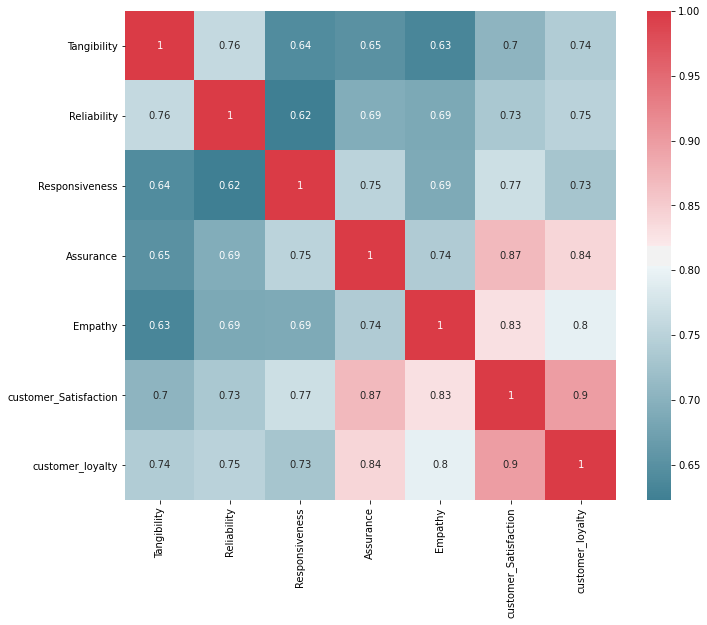

In [42]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df3.corr(), annot = True,cmap=cmap)

In [62]:
dfn

,id,Gender,Age_,income,loyalty,tang1,tang2_,rea1,rea2,resp1,...,Unnamed:_26,Unnamed:_27,Tangibility,Reliability,Responsiveness,Assurance,Empathy,customer_Satisfaction,customer_loyalty,service_quality
0,1,Male,<30,≥1000,8-11 years,4,3,4,4,4,...,3.0,4.0,3.5,4.0,4.5,3.00,3.67,3.5,3.2,3.734
1,2,Male,<30,≥1000,< 4years,3,3,2,3,4,...,2.0,3.0,3.0,2.5,4.0,2.33,2.33,2.5,2.8,2.832
2,3,Female,<30,<200,4-7 years,3,2,2,2,3,...,2.0,2.0,2.5,2.0,3.0,1.67,1.00,2.0,1.8,2.034
3,4,Male,<30,<200,< 4years,3,3,3,3,3,...,3.0,3.0,3.0,3.0,3.0,4.67,2.00,2.5,2.6,3.134
4,5,Female,<30,800-999,< 4years,2,1,1,2,1,...,1.0,1.0,1.5,1.5,1.5,1.67,4.33,2.5,1.8,2.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,Male,<30,≥1000,< 4years,3,3,2,3,4,...,NaN,NaN,3.0,2.5,3.0,2.33,2.33,3.0,2.4,2.632
118,119,Male,36-40,600-799,< 4years,3,3,3,3,3,...,NaN,NaN,3.0,3.0,3.0,3.00,3.00,3.0,3.0,3.000
119,120,Female,<30,600-799,< 4years,5,5,5,5,3,...,NaN,NaN,5.0,5.0,3.5,3.67,5.00,4.0,4.4,4.434
120,121,Female,<30,800-999,< 4years,3,3,4,4,3,...,NaN,NaN,3.0,4.0,3.0,3.00,2.67,3.0,2.6,3.134


In [56]:

for_analysis = df.to_csv('for_analsys.csv',index = False)

In [64]:
dfn = pd.read_csv('for_analsys.csv')